In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Read file and pass in 
diabetes = pd.read_csv("diabetic_data.csv")

diabetes.head()

medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [3]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
# Breakout of Medication Values 

for med in medications: 
    print(med)
    print(diabetes[med].value_counts())
    print("-"* 40)
    
    


metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
----------------------------------------
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
----------------------------------------
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
----------------------------------------
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
----------------------------------------
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
----------------------------------------
acetohexamide
No        101765
Steady         1
Name: acetohexamide, dtype: int64
----------------------------------------
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
--------------

In [5]:
# Isolation Medications and Result 
med_eda = diabetes[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','readmitted']]



In [6]:
# Aggregate by medication 
insulin = med_eda.loc[:,['insulin','readmitted']].groupby(['insulin','readmitted']).agg({'readmitted':['count']})
metformin = med_eda.loc[:,['metformin','readmitted']].groupby(['metformin','readmitted']).agg({'readmitted':['count']})
examide = med_eda.loc[:,['examide','readmitted']].groupby(['examide','readmitted']).agg({'examide':['count']})
glimepiride = med_eda.loc[:,['glimepiride','readmitted']].groupby(['glimepiride','readmitted']).agg({'glimepiride':['count']})
rosiglitazone = med_eda.loc[:,['rosiglitazone','readmitted']].groupby(['rosiglitazone','readmitted']).agg({'rosiglitazone':['count']})
pioglitazone = med_eda.loc[:,['pioglitazone','readmitted']].groupby(['pioglitazone','readmitted']).agg({'pioglitazone':['count']})

In [7]:
# need to think about how to utilize dummification 
pd.get_dummies(diabetes.metformin, prefix = "metformin")

metformin_Down  metformin_No  metformin_Steady  metformin_Up
0                    0             1                 0             0
1                    0             1                 0             0
2                    0             1                 0             0
3                    0             1                 0             0
4                    0             1                 0             0
...                ...           ...               ...           ...
101761               0             0                 1             0
101762               0             1                 0             0
101763               0             0                 1             0
101764               0             1                 0             0
101765               0             1                 0             0

[101766 rows x 4 columns]

In [8]:
med_eda.readmitted.value_counts()


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [9]:
# quantify the readmitted categories 
med_eda.readmitted.replace(['NO','<30','>30'], [0,25, 60], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Insulin

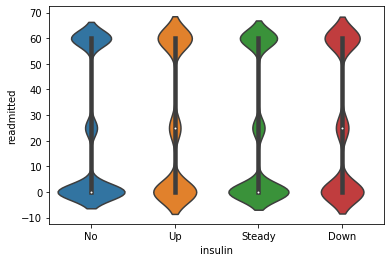

In [10]:
sns.violinplot(med_eda.insulin, med_eda.readmitted)

# a bit spread out as far as readmittance goes

In [11]:
insulin

readmitted
                        count
insulin readmitted           
Down    <30              1698
        >30              4752
        NO               5768
No      <30              4756
        >30             15949
        NO              26678
Steady  <30              3433
        >30             10482
        NO              16934
Up      <30              1470
        >30              4362
        NO               5484

## Examide

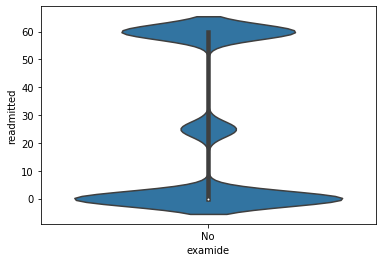

In [12]:
sns.violinplot(med_eda.examide, med_eda.readmitted)

# no change in examide dosage 

In [13]:
examide

examide
                     count
examide readmitted        
No      <30          11357
        >30          35545
        NO           54864

## Glimepiride

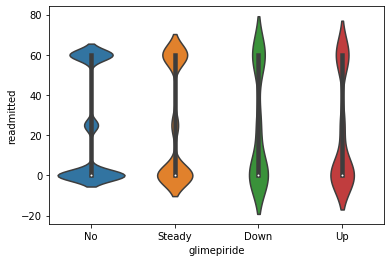

In [14]:
sns.violinplot(med_eda.glimepiride, med_eda.readmitted)

# looks like unprescribed is most ikey for readmitted less than 30 days 

In [15]:
glimepiride

glimepiride
                             count
glimepiride readmitted            
Down        <30                 25
            >30                 68
            NO                 101
No          <30              10827
            >30              33638
            NO               52110
Steady      <30                468
            >30               1737
            NO                2465
Up          <30                 37
            >30                102
            NO                 188

## Rosiglitazone

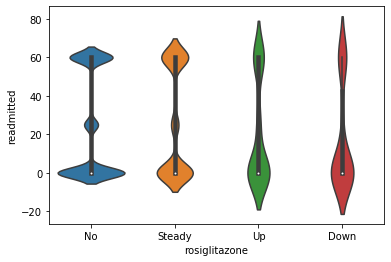

In [16]:
sns.violinplot(med_eda.rosiglitazone, med_eda.readmitted)

# looks like unprescribed is most for readmitted less than 30 days 

In [17]:
rosiglitazone

rosiglitazone
                                 count
rosiglitazone readmitted              
Down          <30                    5
              >30                   22
              NO                    60
No            <30                10692
              >30                33136
              NO                 51573
Steady        <30                  641
              >30                 2335
              NO                  3124
Up            <30                   19
              >30                   52
              NO                   107

## Pioglitazone

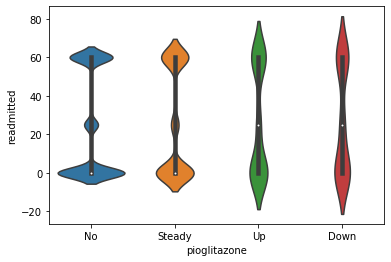

In [18]:
sns.violinplot(med_eda.pioglitazone, med_eda.readmitted)

# looks like unprescribed is most ikey for readmitted less than 30 days 

In [19]:
pioglitazone

pioglitazone
                               count
pioglitazone readmitted             
Down         <30                  18
             >30                  45
             NO                   55
No           <30               10583
             >30               32788
             NO                51067
Steady       <30                 727
             >30                2620
             NO                 3629
Up           <30                  29
             >30                  92
             NO                  113

## Metformin

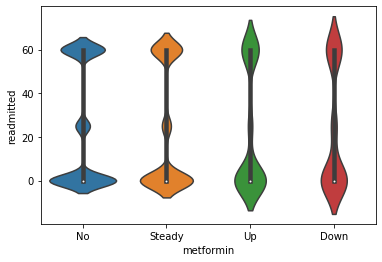

In [20]:
sns.violinplot(med_eda.metformin, med_eda.readmitted)

# looks like unprescribed is most ikey for readmitted less than 30 days 

In [21]:
metformin 

readmitted
                          count
metformin readmitted           
Down      <30                69
          >30               190
          NO                316
No        <30              9418
          >30             28839
          NO              43521
Steady    <30              1782
          >30              6169
          NO              10395
Up        <30                88
          >30               347
          NO                632

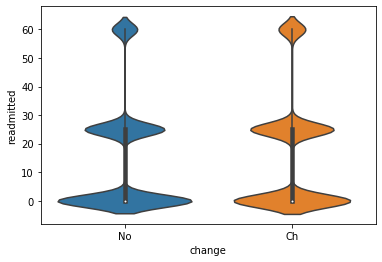

In [22]:
change = diabetes[['change', 'readmitted']]
change.readmitted.replace(['NO', '>30','<30'], [0,25, 60], inplace = True)

sns.violinplot(change.change, change.readmitted) 
# Direction of dosage change seems to matter - may feature engineer a increase / decrease dosage 
# No change includes a lot of people in good shape. 

In [23]:
med_eda.insulin.value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

# Feature Engineering


In [ ]:
med_eda.columns

In [ ]:
# Droppable Columns - No Distinguishable Values
print(med_eda.examide.value_counts())
print(med_eda.citoglipton.value_counts())

In [ ]:
# Drop examide and citoglipton
med_eda.drop(columns = ['examide', 'citoglipton'], inplace=True)

In [ ]:
# New List of Medications 
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [24]:
# Flag for change of dosage
for med in medications:
    medname = str(med) + 'temp'
    med_eda[medname] = med_eda[med].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

# Number of Medications Changed
med_eda['numchange'] = 0 
for med in medications: 
    medname = str(med) + 'temp'
    med_eda['numchange'] = med_eda['numchange'] + med_eda[medname]
    del med_eda[medname]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [25]:
med_eda.head().T

0   1       2   3       4
metformin                 No  No      No  No      No
repaglinide               No  No      No  No      No
nateglinide               No  No      No  No      No
chlorpropamide            No  No      No  No      No
glimepiride               No  No      No  No      No
acetohexamide             No  No      No  No      No
glipizide                 No  No  Steady  No  Steady
glyburide                 No  No      No  No      No
tolbutamide               No  No      No  No      No
pioglitazone              No  No      No  No      No
rosiglitazone             No  No      No  No      No
acarbose                  No  No      No  No      No
miglitol                  No  No      No  No      No
troglitazone              No  No      No  No      No
tolazamide                No  No      No  No      No
examide                   No  No      No  No      No
citoglipton               No  No      No  No      No
insulin                   No  Up      No  Up  Steady
glyburide-metformin       No  No      No  No      No
glipizide-metformin       No  No      No  No      No
glimepiride-pioglitazone  No  No      No  No      No
metformin-rosiglitazone   No  No      No  No      No
metformin-pioglitazone    No  No      No  No      No
readmitted                 0  60       0   0       0
numchange                  0   1       0   1       0

In [26]:
med_eda.numchange.value_counts()

0    74063
1    26272
2     1318
3      108
4        5
Name: numchange, dtype: int64

In [30]:
med_eda.shape

(101766, 25)

In [31]:
med_eda.to_csv(index = False)

'metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,numchange\nNo,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0\nNo,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,60,1\nNo,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0\nNo,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,0,1\nNo,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,0,0\nNo,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,60,0\nSteady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,0,0\nNo,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,60,0\nNo,No,No,No,No,No,Steady,No,No,No,

In [32]:
pwd

'/Users/NYCDSA/Desktop/dataset_diabetes'